# Project Jupyter Notebook 2 (Preprocessing and Multiclass Classification)

### Group 51

André Lourenço – 20240743 <br>
Carolina Pinto – 20240494 <br>
Daniel Caridade – 20211588 <br>
Fábio dos Santos - 20240678 <br>
Gustavo Gomes – 20240657 <br>

## Table of Contents
- [1. Import Libraries](#1-import-libraries)
- [2. Data Integration](#2-data-integration)
   - [2.1 Data Description](#21-data-description)
- [3. Additional Feature Exploration and Minimal Preprocessing](#3-additional-features-exploration-and-minimal-preprocessing)
- [4. Data Preprocessing](#4-data-preprocessing)
   - [4.1. Spliting the data to avoid data leakage](#41-spliting-the-data-to-avoid-data-leakage)
   - [4.2. Treat Incoherences](#42-treat-incoherences)
   - [4.3. Outliers](#43-outliers)
   - [4.4. Additional row-wise transformations](#44-additional-row-wise-transformations)
   - [4.5. Handling missing values](#45-handling-missing-values)
   - [4.6. Feature Engeneering](#46-feature-engeneering)
   - [4.7. Imputation algorithms for the remaining missing values](#47-imputation-algorithms-for-the-remaining-missing-values)
   - [4.8. Preprocessing function](#48-preprocessing-function)
- [5. Strategy for Feature Selection](#5-strategy-for-feature-selection)
- [6. Model Assessment and Optimization](#6-model-assessment-and-optimization)
   - [6.1. Prepare the data for cross validation](#61-prepare-the-data-for-cross-validation)
   - [6.2. Perform Cross Validation](#62-perform-cross-validation)
- [7. Deployment](#7-deployment)

# 1. Import libraries

__`Step 1`__ Import the required packages

In [2]:
#!pip install category-encoders


In [3]:
#pip install xgboost


In [4]:
# Geral libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import category_encoders

# Pre-Processing
from category_encoders import CountEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Model Assessment and Optimization
from scipy.stats import spearmanr
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Perform under and oversampling
from imblearn.combine import SMOTETomek

# Hyper parameter tuning
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV

# Storing the results to use in the open ended
import joblib
import json

# 2. Data Integration

__`Step 2`__ Import the dataset __train_data.csv__ using the method **read_csv()** from pandas.

In [5]:
df = pd.read_csv('Data/train_data.csv')

C:\Users\danie\AppData\Local\Temp\ipykernel_31472\3731236379.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/train_data.csv')


## 2.1. Data description

Train set: New York Workers’ Compensation Board (WCB) claims data assembled from the star of 2020 till the end of 2022.


`Accident Date`: Injury date of the claim. <br>
`Age at Injury`: Age of injured worker when the injury occured. <br>
`Alternative Disrute Resolution`: Adjudication process external to the Board. <br>
`Assembly Date`: The date the claim was first assembled. <br>
`Attorney/ Representative`: Is the claim being represented by an Attorney? <br>
`Average Weekly Wage`: The wage used to calculate workers' compensation, disability, or an Paid Leave wage replacement benefits. <br>
`Birth Year`: The reported year of birth of the injured worker. <br>
`C-2 Date`: Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2). <br>
`C-3 Date`: Date Form C-3 (Employee Claim Form) was received. <br>
`Carrier Name`: Name of primary insurance provider responsible for providing workers' compensation coverage to the injured worker's employer. <br>
`Carrier Type`: Type of primary insurance provider responsible for providing workers compensation coverage. <br>
`Claim Identifier`: Unique identifier for each claim, assigned by WCB. <br>
`County of Injury`: Name of the New York County where the injury occurred. <br>
`COVID-19 Indicator`: Indication that the claim may be associated with COVID-19. <br>
`District Name`: Indication of the WCB district office that oversees claims for that region or area of the state <br>
`First Hearing Date`: Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held. <br>
`Gender`: The reported gender of the injured worker. <br>
`IME-4 Count`: Number of IME-4 forms received per claim. The IME-4 form is the "Independent Examiner's Report of Independent Medical Examination" form <br>
`Industry Code`: NAICS code and descriptions available at: https://www.naics.com/search-naics-codes-by-industry/. <br>
`Industry Code Description`: 2-digit NAICS industry code description used to classify businesses according to their economic activity <br>
`Medical Fee Region`: Approcimate region where the injured worker would receive medical service <br>
`OIICS Nature of Injury Description`: The OIICS nature of injury codes & description are available at https://www.bls.gov/iif/oiics_manual_2007.pdf. <br>
`WCIO Cause of Injury Code`: The WCIO cause of injury codes & descriptions are at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf <br>
`WCIO Cause of Injury Description`: See description of field above <br>
`WCIO Nature of Injury Code`: The WCIO nature of injury are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf <br>
`WCIO Nature of Injury Description`: See description of field above <br>
`WCIO Part Of Body Code`: The WCIO part of body codes & descrptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf <br>
`WCIO Part of Body Description`: See description of field above. <br>
`Zip Code`: The reported ZIP code of the injured worker's home adress. <br>
`Agreement Reached`: __Binary variable:__ Yes if there is an agreement without the involvement of the WCB -> __unknown__ at the start of claim. <br>
`WCB Decision`: __Multiclass variable__ Decision of the WCB relative to the claim "Accident" means that claim refers to workplace accident, "Occupational Disease" means illness from the workplace. -> __requires WCB deliberation__ so it is unknown at start of claim. <br>
`Claim injury Type`: __Main target variable:__ Deliberation of the WCB relative to benefits awarded to the claim. __Numbering indicates severity__

# 3. Additional Feature Exploration and Minimal Preprocessing

__`Step 3`__ Create the colour pallete that will be used for visualization purposes.

In [6]:
color_390 = (190/255, 214/255, 47/255)  # Pantone 390 C
color_431 = (92/255, 102/255, 108/255)  # Pantone 431 C
sns.set_palette([color_390, color_431])

_`Step 4`_ Drop columns that are not in the test set.

In [7]:
df.drop(columns=["Agreement Reached" , "WCB Decision"], inplace=True)

__`Step 4`__ Creating a list called ´**date_columns** that stores all date columns.

In [8]:
date_columns=['C-2 Date', 'C-3 Date', 'First Hearing Date', 'Assembly Date', 'Accident Date']

__`Step 4.1`__ Converting the date columns into datetime type.

In [9]:
# Convert again the date columns to date time
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

__`Step 5`__ Recreating the additional features that were explored in the exploratory data analysis and that were considered relevant for the analysis.

In [10]:
# Time to Assembly
df['Time to Assembly'] = (df['Assembly Date'] - df['Accident Date']).dt.days

# C-2 Report Status
df['C-2 Report Status'] = df.apply(
    lambda row: 'Not Received' if pd.isna(row['C-2 Date']) 
                else ('Received on or before Assembly' if row['C-2 Date'] <= row['Assembly Date'] 
                      else 'Received after Assembly'),
    axis=1
)

# C-3 Report Status
df['C-3 Report Status'] = df.apply(
    lambda row: 'Not Received' if pd.isna(row['C-3 Date']) 
                else ('Received on or before Assembly' if row['C-3 Date'] <= row['Assembly Date'] 
                      else 'Received after Assembly'),
    axis=1
)

__`Step 6`__ Removing all the rows that only have missing values.

In [11]:
df.dropna(subset='Claim Injury Type', inplace=True)

- We dropped NaN in the `Claim Injury Type` feature since the missing values in this feature correspond to the rows that only have missing values. Using this perspective is logically faster than to give them a list with all the features except `Assembly Date`, `C-2 Report Status`, `C-3 Report Status` that are the columns that don't have missing values.
- Additionally, as `Claim Injury Type` is our target feature any rows with missing values in this feature would be inrelevant to our analysis.

__`Step 7`__ Set the index of the dataframe as `Claim Identifier`.

In [12]:
df.set_index('Claim Identifier', inplace=True)

- Claim Indentifier serves as a unique identifier for each claim.

# 4. Data Preprocessing

## 4.1. Spliting the data to avoid data leakage

__`Step 8`__ Create a copy of the original dataframe named **data**.

In [13]:
# Create a copy of the dataset
data = df.copy()

# Checking the number of rows and columns to see if aligns 
data.shape

(574026, 33)

__`Step 9`__ Create a varaible called `X` that store the values of the input features and `y` that stores the values of the target feature.

In [14]:
X = data.drop(columns=['Claim Injury Type'], axis =1)
y = data['Claim Injury Type']  

__`Step 10`__ Split the data in train and test set in a 70/30 split, with random_state = 0, stratification by y and with shuffle of the dataset.

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 15, 
                                                  stratify = y, 
                                                  shuffle = True)

__`Step 10.1`__ Calculate the lenght of the train data set.

In [16]:
len_X_train=len(X_train)

- This first split was made for testing the preprocessing methods. For feature selection and model assessment and optimization we will use cross validation with the preprocessing inside.

## 4.2. Treat incoherences

__`Step 11`__ Creating a function that checks if a value cannot be converted into an integer or if it can.

In [17]:
def cannot_be_int(val):
    try:
        int(float(val))
        return False
    except ValueError:
        return True

__`Step 11.5`__ Create a function can_be_int that checks if a value can be converted into integer or not.

In [18]:
def can_be_int(val):
    try:
        int(float(val))
        return True     
    except ValueError:
        return False

__`Step 12`__ Creating a function to treat the incoherences in the data.

In [19]:
def treating_incoherences(train_data, val_data):
    def apply_transformations(data, is_training=True):
        # Remove rows where "Accident Date" is after "C-2 Date" or "C-3 Date" only if the data is from training
        if is_training:
            data = data[~(data['Accident Date'] > data['C-2 Date'])]
            data = data[~(data['Accident Date'] > data['C-3 Date'])]
        
        # Remove rows where "Accident Date" is after "Assembly Date" only if the data is from training
        if is_training:
            data = data[~(data['Accident Date'] > data['Assembly Date'])]

        # Replace "Age at Injury" < 16 with NaN
        data.loc[data['Age at Injury'] < 16, 'Age at Injury'] = np.nan

        # Replace 0 with NaN in "Birth Year"
        data["Birth Year"] = data["Birth Year"].replace(0, np.nan)

        # Create "Average Weekly Wage ZERO" flag and replace 0 with NaN in "Average Weekly Wage"
        data['Average Weekly Wage ZERO'] = data['Average Weekly Wage'].apply(lambda x: 0 if x == 0 else 1)
        data["Average Weekly Wage"] = data["Average Weekly Wage"].replace(0, np.nan)

        # Update 'COVID-19 Indicator' where WCIO Nature of Injury Description indicates COVID-19
        data.loc[
            (data['COVID-19 Indicator'] != 'Y') & (data['WCIO Nature of Injury Description'] == 'COVID-19'),
            'COVID-19 Indicator'
        ] = 'Y'

        # Process invalid zip codes
        invalid_zip_mask = data['Zip Code'].notna() & data['Zip Code'].apply(cannot_be_int)
        data.loc[invalid_zip_mask, 'Zip Code'] = np.nan
        data['Zip Code'] = pd.to_numeric(data['Zip Code'], errors='coerce')
        data.loc[data['Zip Code'] < 100, 'Zip Code'] = np.nan
        data.loc[data['Zip Code'] < 1000, 'Zip Code'] *= 10

        # Process zip codes with specific patterns
        zip_codes_with_last_digit_zero_7 = data[
            data['Zip Code'].notna() &
            (data['Zip Code'].astype(str).str.len() == 7) &
            (data['Zip Code'].astype(str).str.endswith('0'))
        ].index
        data.loc[zip_codes_with_last_digit_zero_7, 'Zip Code'] = data.loc[
            zip_codes_with_last_digit_zero_7, 'Zip Code'
        ].apply(lambda x: int(float(x)))

        zip_codes_with_last_digit_zero_6 = data[
            data['Zip Code'].notna() &
            (data['Zip Code'].astype(str).str.len() == 6) &
            (data['Zip Code'].astype(str).str.endswith('0'))
        ].index
        data.loc[zip_codes_with_last_digit_zero_6, 'Zip Code'] = data.loc[
            zip_codes_with_last_digit_zero_6, 'Zip Code'
        ].apply(lambda x: int(float(x)))

        # Consolidate industry codes, cause of injury codes, and part of body codes
        data['Industry Code'] = data['Industry Code'].replace({33: 31, 32: 31, 45: 44, 49: 48})
        data['WCIO Cause of Injury Code'] = data['WCIO Cause of Injury Code'].replace({17: 79, 66: 79, 94: 97})
        data['WCIO Part Of Body Code'] = data['WCIO Part Of Body Code'].replace({22: 43, 25: 18, 47: 23, -9: 10})

        # Drop unnecessary columns
        columns_to_drop = ["OIICS Nature of Injury Description",'Industry Code Description', 
                   'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'C-2 Date',
                   'C-3 Date']
        data.drop(columns=columns_to_drop, inplace= True)

        # Return the transformed dataset
        return data

    # Apply transformations
    train_data = apply_transformations(train_data, is_training=True)
    val_data = apply_transformations(val_data, is_training=False)

    return train_data, val_data

**Reasoning for the transformations done in `Zip Code`**

- We decided to transform into missing values all the values in `Zip Code` that couldn't be transformed into integers because the American `Zip Code` format do not support letters between the numbers.
- The values below 100 were converted into missing values since the Zip Codes are 5-digit representations of a region.
- Values below 1000 suffered a transformation (multiplication by 10) since there are Zip Codes in the US that start with 0, so for instance 789 can represent the region 07890 that's why the multiplication by ten was emplowed.
- We converted the Zip Codes with lenght equal to 6 or 7 into integers, since they ended up with '.0' so they are valid Zip Codes but are expressed as floats.

**Reason behind the early elimination of the features in columns_to_drop**

- `OIICS Nature of Injury Description` is a column full of missing values, so we need to remove it otherwise imputation models applied to other features won't work.
- `Industry Code Description`, `WCIO Cause of Injury Description`, `WCIO Nature of Injury Description`, `WCIO Part Of Body Description` were removed since we already have the codes that provide exaclty the same information that the descriptions and we don't want the imputation algorithms used further (KNNImputed) to have the extra work of computing even more distances that are fairly unecessary. For the models to predict the target makes no sense to have this redundant features as well.
- `C-2 Date` and `C-3 Date` were removed since the features `C-2 Report Status` and `C-3 Report Status` created previously store most of the information that is given by `C-2 Date` and `C-3 Date` and handle their missing values.

__`Step 13`__ Applying the transformations train and validation.

In [20]:
X_train, X_val = treating_incoherences(X_train, X_val)

__`Step 14`__ Making the y_train and y_val fit the values in X_train and y_train

In [21]:
y_train = y_train.loc[X_train.index]
y_val = y_val.loc[X_val.index]

## 4.3. Outliers

__`Step 15`__ Check the upper limit of the variable `Age at Injury`.

In [22]:
Q1 = X_train['Age at Injury'].quantile(0.25)
Q3 = X_train['Age at Injury'].quantile(0.75)
IQR = Q3 - Q1
upper_limit_age = Q3 + 1.5 * IQR

print(f"Upper limit for 'Age at Injury': {upper_limit_age}")

Upper limit for 'Age at Injury': 88.5


__`Step 15.1`__ Check the boxplot of `Age at Injury`.

Text(0, 0.5, 'Value')

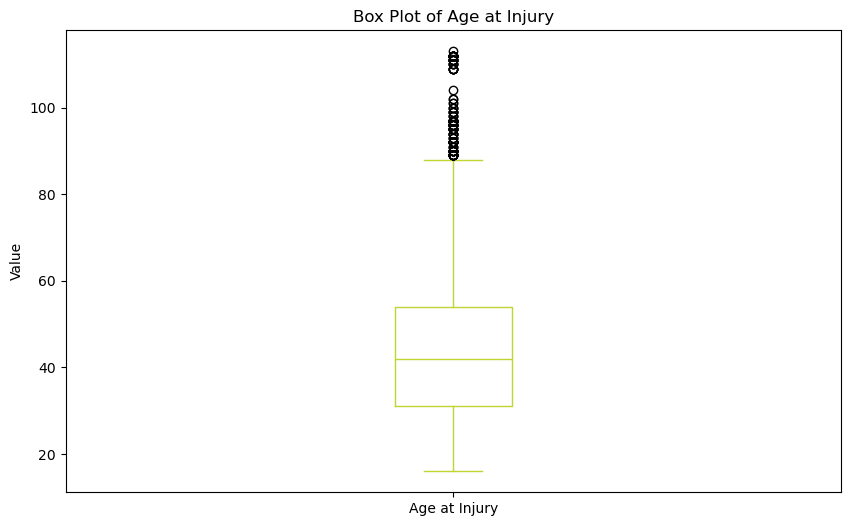

In [23]:
plt.figure(figsize=(10, 6))
X_train['Age at Injury'].plot(kind='box')
plt.title('Box Plot of Age at Injury')
plt.ylabel('Value')

__`Step 16`__ Check the boxplot of `Birth Year`.

Text(0, 0.5, 'Value')

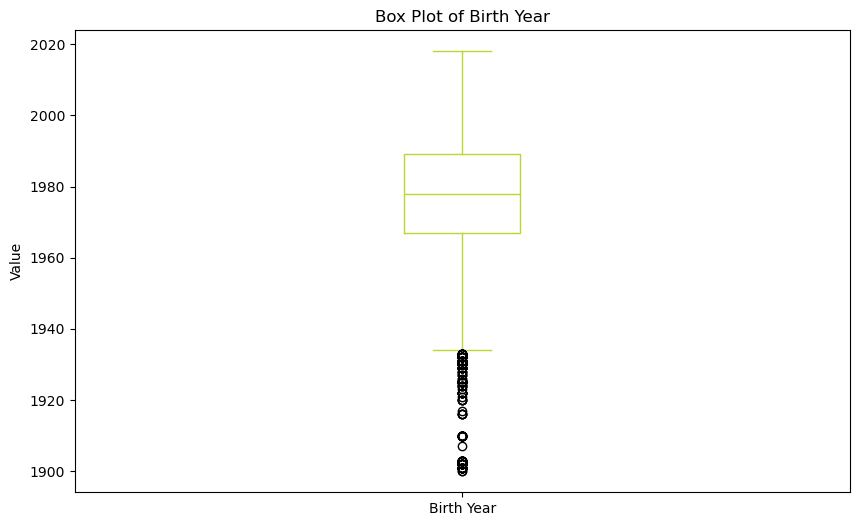

In [24]:
plt.figure(figsize=(10, 6))
X_train['Birth Year'].plot(kind='box')
plt.title('Box Plot of Birth Year')
plt.ylabel('Value')

__`Step 16.1`__ Check the lower limit of the variable `Birth Year`.

In [25]:
Q1 = X_train['Birth Year'].quantile(0.25)
Q3 = X_train['Birth Year'].quantile(0.75)
IQR = Q3 - Q1
lower_limit_birth = Q3 - 3 * IQR

print(f"Upper limit for 'Birth Year': {lower_limit_birth}")

Upper limit for 'Birth Year': 1923.0


__`Step 17`__ Check the boxplot of the variable `IME-4 Count`.

Text(0, 0.5, 'Value')

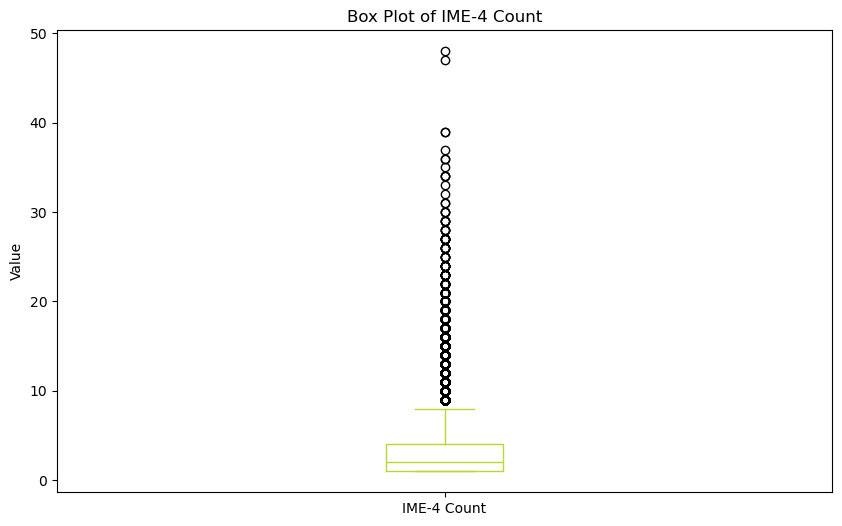

In [26]:
plt.figure(figsize=(10, 6))
X_train['IME-4 Count'].plot(kind='box')
plt.title('Box Plot of IME-4 Count')
plt.ylabel('Value')

__`Step 17.1`__ Check the upper limit for the variable `IME-4 Count`.

In [27]:
Q1 = X_train['IME-4 Count'].quantile(0.25)
Q3 = X_train['IME-4 Count'].quantile(0.75)
IQR = Q3 - Q1
upper_limit_ime = Q3 + 1.5 * IQR

print(f"Upper limit for 'IME-4 Count': {upper_limit_ime}")

Upper limit for 'IME-4 Count': 8.5


__`Step 18`__ Check the boxplot of `Average Weekly Wage`.

Text(0, 0.5, 'Value')

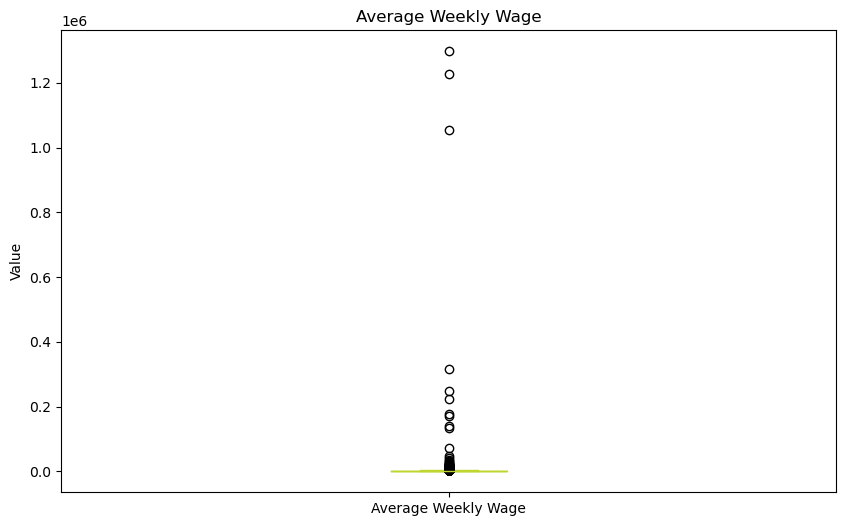

In [28]:
plt.figure(figsize=(10, 6))
X_train['Average Weekly Wage'].plot(kind='box')
plt.title('Average Weekly Wage')
plt.ylabel('Value')

__`Step 18.1`__ Check the upper limits of `Average Weekly Wage`.

In [29]:
Q1 = X_train['Average Weekly Wage'].quantile(0.25)
Q3 = X_train['Average Weekly Wage'].quantile(0.75)
IQR = Q3 - Q1
first_upper_limit_wage = Q3 + 1.5 * IQR
second_upper_limit_wage = Q3 + 3 * IQR

print(f"First upper limit for 'Average Weekly Wage': {first_upper_limit_wage}")
print(f"Second upper limit for 'Average Weekly Wage': {second_upper_limit_wage}")

First upper limit for 'Average Weekly Wage': 2884.8187500000004
Second upper limit for 'Average Weekly Wage': 4195.71


__`Step 19`__ Check the boxplot of `Time to Assembly`.

Text(0, 0.5, 'Value')

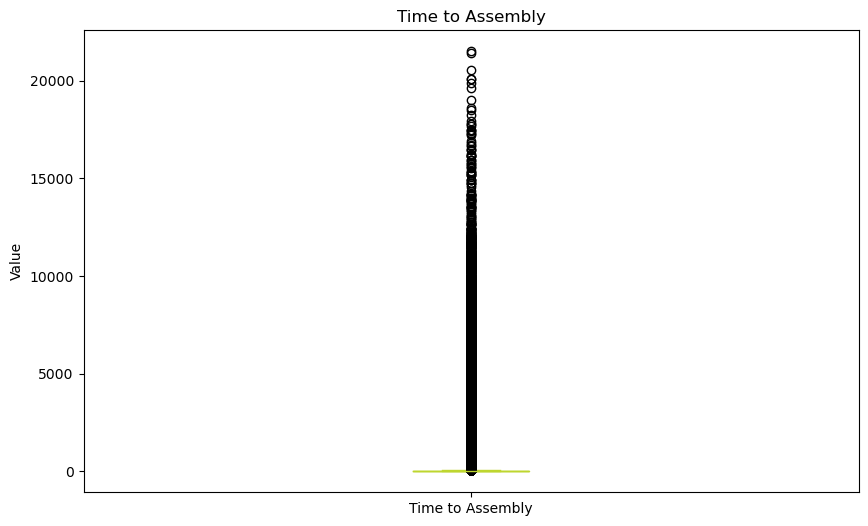

In [30]:
plt.figure(figsize=(10, 6))
X_train['Time to Assembly'].plot(kind='box')
plt.title('Time to Assembly')
plt.ylabel('Value')

__`Step 20`__ Create a function to treat outliers.

In [31]:
def outlier_treatment(X_train, y_train): 
    # Calculate the upper limit for 'Age at Injury' using IQR
    Q1 = X_train['Age at Injury'].quantile(0.25)
    Q3 = X_train['Age at Injury'].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit_age = Q3 + 1.5 * IQR  # Upper bound for outliers

    # Calculate the upper limit for 'Birth Year' using IQR
    Q1 = X_train['Birth Year'].quantile(0.25)
    Q3 = X_train['Birth Year'].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit_birth = Q3 - 3 * IQR
    
    # Remove outliers based on 'Age at Injury', but leave missing values intact
    X_train = X_train[(X_train['Age at Injury'] < upper_limit_age) | X_train['Age at Injury'].isna()]
    y_train = y_train.loc[X_train.index]
    
    # Remove outliers based on 'Birth Year', but leave missing values intact
    X_train = X_train[(X_train['Birth Year'] > lower_limit_birth) | X_train['Birth Year'].isna()]
    y_train = y_train.loc[X_train.index]
    
    # Apply treatment for 'IME-4 Count' (replace values greater than 30 with 30), but leave missing values intact
    X_train['IME-4 Count'] = X_train['IME-4 Count'].apply(lambda x: 30 if x > 30 else x if pd.notna(x) else x)
    
    # Remove outliers based on 'Average Weekly Wage', but leave missing values intact
    X_train = X_train[(X_train['Average Weekly Wage'] < 10000) | X_train['Average Weekly Wage'].isna()]
    y_train = y_train.loc[X_train.index]

    return X_train, y_train

Based on the visualizations and on the percentage of rows reasonable to remove, we decided to:
- Drop the outliers in `Age at Injury` that are above the upper limit given by Q3 + 1.5 * IQR (common thereshold for outliers).
- Drop the outliers in `Birth Year` that are below the lower limit given by Q3 - 3 * IQR (common thereshold for outliers)
- Replace the values above 30 by 30 (the thereshold defined based on the visualizations, where the outliers tend to become sparser) in `IME-4 Count`.
- Drop the outliers in `Average Weekly Wage` that are above 10000, since, acording to the visualizations, it's when they start to become sparser.

__`Step 21`__ Apply the transformations.

In [32]:
X_train, y_train= outlier_treatment(X_train, y_train)

__`Step 22`__ Checking the boxplots after the outlier treatment.

Text(0, 0.5, 'Value')

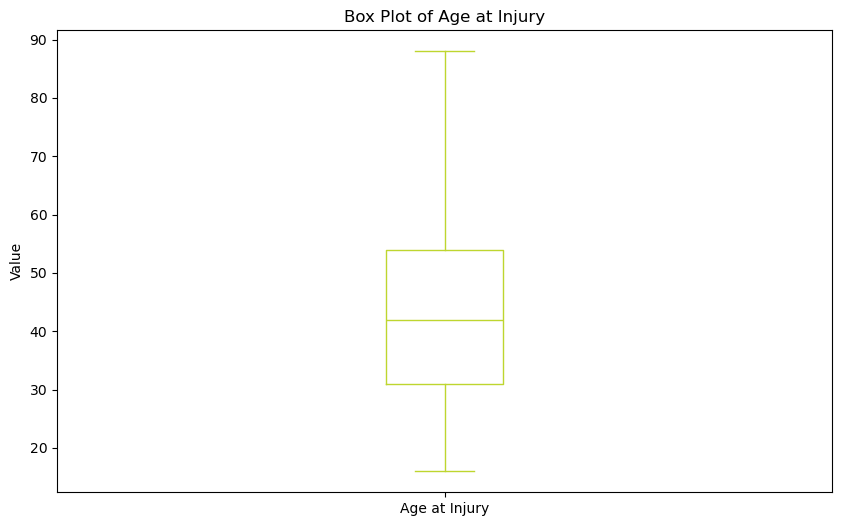

In [33]:
plt.figure(figsize=(10, 6))
X_train['Age at Injury'].plot(kind='box')
plt.title('Box Plot of Age at Injury')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

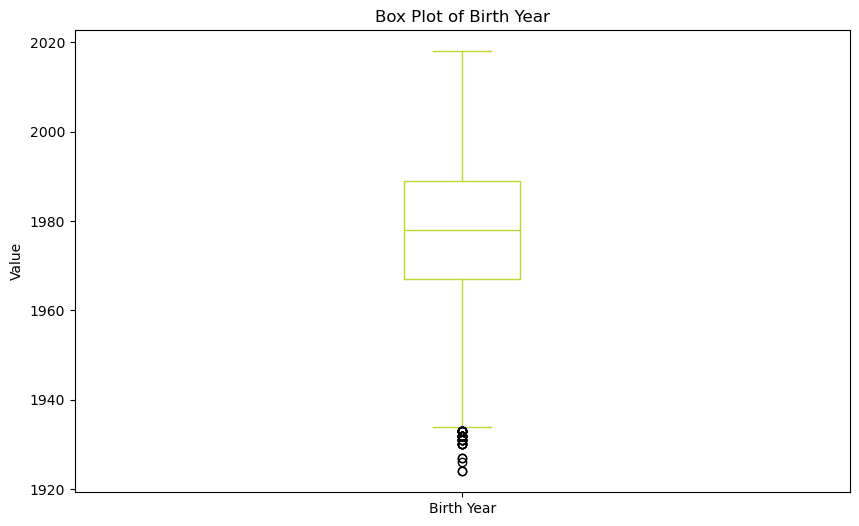

In [34]:
plt.figure(figsize=(10, 6))
X_train['Birth Year'].plot(kind='box')
plt.title('Box Plot of Birth Year')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

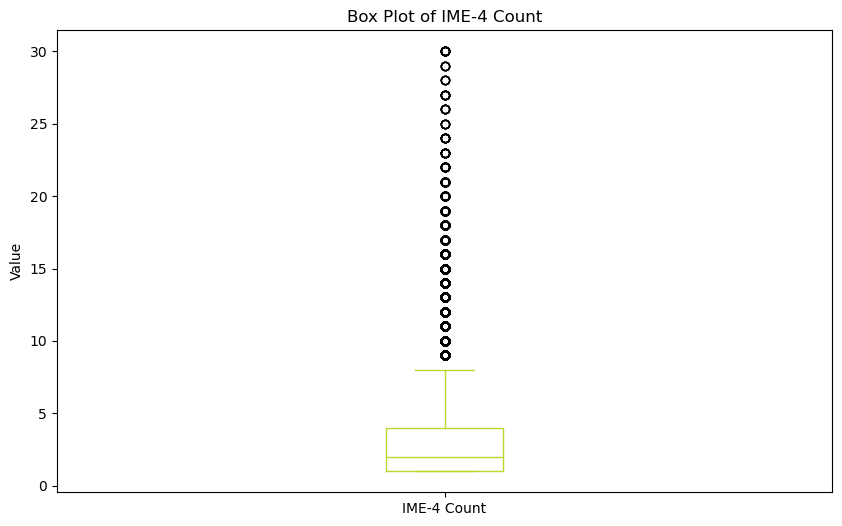

In [35]:
plt.figure(figsize=(10, 6))
X_train['IME-4 Count'].plot(kind='box')
plt.title('Box Plot of IME-4 Count')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

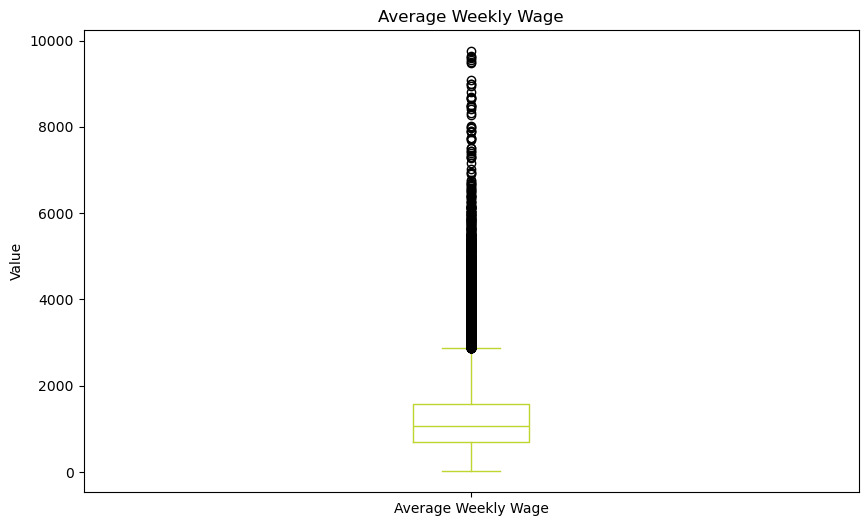

In [36]:
plt.figure(figsize=(10, 6))
X_train['Average Weekly Wage'].plot(kind='box')
plt.title('Average Weekly Wage')
plt.ylabel('Value')

__`Step 23`__ Check percentage of rows removed.

In [37]:
(1-(len(X_train)/len_X_train))*100

0.35040739837438606

In [38]:
(1 - ((len(X_train) + len(X_val)) / len(df))) * 100

0.2452850567744358

- We only removed 0.35% of the train data set and 0.245% of the all df.
- After the outlier treatment the boxplots show a more reasonable distribution, less prone to bias the models.

## 4.4. Additional row-wise transformations

__`Step 24`__ Create a function to do additional row-wise transformations.

In [39]:
def additional_row_wise_transformations(data):
    
    # Replace 'U' with 'N' in 'Alternative Dispute Resolution'
    if 'Alternative Dispute Resolution' in data.columns:
        data['Alternative Dispute Resolution'] = data['Alternative Dispute Resolution'].replace('U', 'N')

    # Replace specific values in 'Carrier Type' with 'Other'
    if 'Carrier Type' in data.columns:
        data['Carrier Type'] = data['Carrier Type'].replace(
            {'5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 'Other',
             '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 'Other'}
        )

    # Replace 'U' and 'X' with NaN in 'Gender'
    if 'Gender' in data.columns:
        data['Gender'] = data['Gender'].replace(['U', 'X'], np.nan)

    return data

__`Step 25`__ Apply the transformations.

In [40]:
X_train = additional_row_wise_transformations(X_train)
X_val = additional_row_wise_transformations(X_val)

**Reasoning for this Additional Row-wise transformations**

- The value 'U' in `Alternative Dispute Resolution` only helps us determining the most common target feature, and there should be plenty of other rules in data that aid us to predict that class. Also they were converted into 'N' since **99.5%** of the pbservations belong to this class so even using a imputation algorithm is very likely that it classifies these observations as 'N'. This way by avoiding an more or less useless rule we aim to reduce overfitting in the model.
- The labels 'U' and 'X' in `Gender` represent on it's majority workers with the most common label in the target feature so we will turn them as missing values for the same reasons of reducing overfitting but not allowing the model to make unecessary rules that only allows us to qualify such a small portion of the training data.
- We grouped '5C. SPECIAL FUND - POI CARRIER WCB MENANDS' and '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)' into a new label called 'Other', since '5C. SPECIAL FUND - POI CARRIER WCB MENANDS' is not in the test set and not just we don't want the model to learn a rule about '5C. SPECIAL FUND - POI CARRIER WCB MENANDS', but also these two labels have very small representation in our training data (9 rows only).

## 4.5. Handling missing values

__`Step 26`__ Create a function called `calculate_imputation_dict` that calculates and returns the imputation dictionary based on the variable to impute, on the grouping column and on the stategy chosen.

In [41]:
def calculate_imputation_dict(var_imput, var_group, strat, x_train):
    if strat == 'mean':
        imputation_dic = x_train.groupby(var_group)[var_imput].mean().to_dict()
    elif strat == 'mode':
        imputation_dic = x_train.groupby(var_group)[var_imput].agg(
            lambda x: x.mode().iloc[0] if not x.mode().empty else None
        ).to_dict()
    else:
        raise ValueError("Invalid strategy: use 'mean' or 'mode'")
    
    return imputation_dic

__`Step 26.1`__ Create a function called **apply_imputation_dict** that applies imputation based on the previously created dictionary.

In [42]:
def apply_imputation_dict(var_imput, var_group, imputation_dic, df):
    def impute_var(row):
        if pd.isnull(row[var_imput]):
            return imputation_dic.get(row[var_group], row[var_imput])
        else:
            return row[var_imput]
    
    df[var_imput] = df.apply(lambda row: impute_var(row), axis=1)
    return df

__`Step 26.2`__ Create a list named **imputation_task** for the columns that need to be imputed, their grouping feature and the strategy chosen.

In [43]:
imputation_tasks = [
    {'var_imput': 'Zip Code', 'var_group': 'County of Injury', 'strategy': 'mode'},
    {'var_imput': 'Industry Code', 'var_group': 'Carrier Name', 'strategy': 'mode'},
    {'var_imput': 'Industry Code', 'var_group': 'Carrier Type', 'strategy': 'mode'},
    {'var_imput': 'Average Weekly Wage', 'var_group': 'Industry Code', 'strategy': 'mean'},
    {'var_imput': 'Gender', 'var_group': 'Industry Code', 'strategy': 'mode'}
]

# Add multiple features to impute with the same grouping column and strategy
features_to_impute = ['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']
for feature in features_to_impute:
    imputation_tasks.append({'var_imput': feature, 'var_group': 'Industry Code', 'strategy': 'mode'})

__`Step 27`__ Create a function to handle missing values.

In [44]:
def handle_missing_values(train_data, val_data, imputation_tasks):
    
    # Solve missing values in 'Birth Year' using 'Accident Date' and 'Age at Injury'
    train_data["Birth Year"] = train_data["Birth Year"].fillna(
        pd.to_datetime(train_data['Accident Date']).dt.year - train_data['Age at Injury']
    )
    val_data["Birth Year"] = val_data["Birth Year"].fillna(
        pd.to_datetime(val_data['Accident Date']).dt.year - val_data['Age at Injury']
    )

    # Solve missing values in 'Age at Injury' using 'Accident Date' and 'Birth Year'
    train_data["Age at Injury"] = train_data["Age at Injury"].fillna(
        pd.to_datetime(train_data['Accident Date']).dt.year - train_data['Birth Year']
    )
    val_data["Age at Injury"] = val_data["Age at Injury"].fillna(
        pd.to_datetime(val_data['Accident Date']).dt.year - val_data['Birth Year']
    )

    # Fill missing values in 'First Hearing Date' with a default value
    train_data['First Hearing Date'] = train_data['First Hearing Date'].fillna('2030-01-01')
    val_data['First Hearing Date'] = val_data['First Hearing Date'].fillna('2030-01-01')

    # Replace missing values in 'IME-4 Count' with 0
    train_data['IME-4 Count'].replace(np.nan, 0, inplace=True)
    val_data['IME-4 Count'].replace(np.nan, 0, inplace=True)

    # Dictionary to store all imputation dictionaries
    all_imputation_dicts = {}

    # Iterate through imputation tasks
    for task in imputation_tasks:
        var_imput = task['var_imput']
        var_group = task['var_group']
        strategy = task['strategy']
        
        # Calculate the imputation dictionary using the training data
        imputation_dic = calculate_imputation_dict(var_imput, var_group, strategy, train_data)
        
        # Store the dictionary for reference
        all_imputation_dicts[var_imput] = imputation_dic
        
        # Apply the imputation dictionary to both training and validation datasets
        train_data = apply_imputation_dict(var_imput, var_group, imputation_dic, train_data)
        val_data = apply_imputation_dict(var_imput, var_group, imputation_dic, val_data)

        if train_data[var_imput].isna().sum()>0:
            if strategy == 'mean':
            # Impute missing values with the mean
                fallback_value = train_data[var_imput].mean()
            elif strategy == 'mode':
            # Impute missing values with the mode
                fallback_value = train_data[var_imput].mode()[0]
            else:
                raise ValueError(f"Unknown strategy: {strategy}")
            
            train_data[var_imput].fillna(fallback_value, inplace=True)
            val_data[var_imput].fillna(fallback_value, inplace=True)

    
    return train_data, val_data, all_imputation_dicts

__`Step 28`__ Apply the transformations.

In [45]:
X_train, X_val, all_imputation_dicts = handle_missing_values(X_train, X_val, imputation_tasks)

C:\Users\danie\AppData\Local\Temp\ipykernel_31472\3589903696.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['IME-4 Count'].replace(np.nan, 0, inplace=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_31472\3589903696.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

## 4.6. Feature engeneering

__`Step 29`__ Create a list **var_encoding** that stores the features that will be encoded through frequency encoding.

In [46]:
var_encoding = ['Carrier Name', 'County of Injury', 'Zip Code', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 
                'WCIO Part Of Body Code', 'Alternative Dispute Resolution', 'Attorney/Representative', 'Gender', 'Medical Fee Region', 
                'Carrier Type', 'C-2 Report Status', 'C-3 Report Status', 'District Name', 'COVID-19 Indicator', 'Average Weekly Wage ZERO']

__`Step 30`__ Create a function for feature engeneering.

In [47]:
def feature_engineering(X_train, X_val, var_encoding):

    # Ignore warnings
    warnings.filterwarnings("ignore")

    # Create and fit an instance of CountEncoder on X_train
    count_encoder = CountEncoder(cols=var_encoding)
    count_encoder.fit(X_train)

    # Transform X_train and X_val
    X_train[var_encoding] = count_encoder.transform(X_train)[var_encoding]
    X_val[var_encoding] = count_encoder.transform(X_val)[var_encoding]

    # Transform the date columns into numeric, doing the diference between the date they store and a random specific date
    date_cols = ['Accident Date', 'Assembly Date', 'First Hearing Date']
    for col in date_cols:
        X_train[col] = (X_train[col] - pd.Timestamp('2000-01-01')) // pd.Timedelta('1D')
        X_val[col] = (X_val[col] - pd.Timestamp('2000-01-01')) // pd.Timedelta('1D')
    
    # Transform 'Zip Code' to integer
    X_train['Zip Code'] = X_train['Zip Code'].astype(int)
    X_val['Zip Code'] = X_val['Zip Code'].astype(int)

    return X_train, X_val, count_encoder

In [48]:
def feature_engineering_test(X_test, count_encoder, var_encoding):
    """
    Applies feature engineering transformations to the test dataset.

    Parameters:
        X_test (pd.DataFrame): Test dataset.
        count_encoder (CountEncoder): Fitted CountEncoder instance from training data.
        var_encoding (list): List of categorical columns to be encoded using CountEncoder.

    Returns:
        X_test (pd.DataFrame): Transformed test dataset.
    """
    # Step 1: Transform categorical columns using the fitted encoder
    X_test[var_encoding] = count_encoder.transform(X_test)[var_encoding]

    # Step 2: Transform date columns into numerical days since '2000-01-01'
    date_cols = ['Accident Date', 'Assembly Date', 'First Hearing Date']
    for col in date_cols:   	
        X_test[col] = (X_test[col] - pd.Timestamp('2000-01-01')) // pd.Timedelta('1D')

    # Step 3: Transform 'Zip Code' to integer
    X_test['Zip Code'] = X_test['Zip Code'].astype(int)

    return X_test

__`Step 31`__ Apply the transformations.

In [49]:
X_train, X_val, count_encoder = feature_engineering(X_train, X_val, var_encoding)

- Turning `Zip Code` into integers was only done were, because we couldn't do it before, as the missing values in `Zip Code` lack treatment, so Python couldn't convert NaN into integer values.

## 4.7. Imputation algorithms for the remaining missing values

__`Step 32`__ Create a function named **calculate_age_at_injury** that calculates the missing values in `Age at Injury` based on `Accident Date` and `Birth Year`.

In [50]:
def calculate_age_at_injury(row):
    if pd.isnull(row['Age at Injury']) and not pd.isnull(row['Birth Year']) and not pd.isnull(row['Accident Date']):
        accident_year = row['Accident Date'].year
        return accident_year - row['Birth Year']
    else:
        return row['Age at Injury']

X_train['Age at Injury'] = X_train.apply(calculate_age_at_injury, axis=1)
X_val['Age at Injury'] = X_val.apply(calculate_age_at_injury, axis=1)

__`Step 33`__ Create a function **calculate_time_to_assembly** that calculates the missing values in `Time to Assembly`.

In [51]:
def calculate_time_to_assembly(row):
    if pd.isnull(row['Time to Assembly']) and not pd.isnull(row['Assembly Date']) and not pd.isnull(row['Accident Date']):
        return (pd.to_datetime(row['Assembly Date']) - pd.to_datetime(row['Accident Date'])).days
    else:
        return row['Time to Assembly']

X_train['Time to Assembly'] = X_train.apply(calculate_time_to_assembly, axis=1)
X_val['Time to Assembly'] = X_val.apply(calculate_time_to_assembly, axis=1)

__`Step 34`__ Create a function to handle the missing values than will be imputed with KNN and the remaining missing values that can only be imputed after those.

In [52]:
def handle_data_transformation(train_data, val_data, scaler=None, imputer=None):

    # Defining the columns that need to be imputed with KNN
    columns_to_impute=['Accident Date', 'Birth Year']
    
    # Apply MinMax Scaling to the datasets
    if scaler is None:
        scaler = MinMaxScaler()
        train_data_scaled = scaler.fit_transform(train_data)
    else:
        train_data_scaled = scaler.transform(train_data)

    train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data.columns, index=train_data.index)
    
    val_data_scaled = scaler.transform(val_data)
    val_data_scaled = pd.DataFrame(val_data_scaled, columns=val_data.columns, index=val_data.index)
    
    # Apply KNNImputer to the columns that need imputation
    if imputer is None:
        imputer = KNNImputer(n_neighbors=5)
        train_data_imputed = pd.DataFrame(imputer.fit_transform(train_data_scaled[columns_to_impute]),
                                          columns=columns_to_impute, index=train_data.index)
    else:
        train_data_imputed = pd.DataFrame(imputer.transform(train_data_scaled[columns_to_impute]),
                                          columns=columns_to_impute, index=train_data.index)
    
    val_data_imputed = pd.DataFrame(imputer.transform(val_data_scaled[columns_to_impute]),
                                    columns=columns_to_impute, index=val_data.index)
    
    # Replace the imputed columns in the original datasets
    train_data_scaled[columns_to_impute] = train_data_imputed[columns_to_impute]
    val_data_scaled[columns_to_impute] = val_data_imputed[columns_to_impute]

    # Reverse the scaling for the training and validation data
    train_data_original = scaler.inverse_transform(train_data_scaled)
    train_data = pd.DataFrame(train_data_original, columns=train_data.columns).set_index(train_data.index)
    
    val_data_original = scaler.inverse_transform(val_data_scaled)
    val_data = pd.DataFrame(val_data_original, columns=val_data.columns).set_index(val_data.index)
    
    # Convert date columns from numeric to datetime to impute the remaining missing values
    train_data['Accident Date'] = pd.to_datetime('2000-01-01') + pd.to_timedelta(train_data['Accident Date'], unit='D')
    val_data['Accident Date'] = pd.to_datetime('2000-01-01') + pd.to_timedelta(val_data['Accident Date'], unit='D')

    train_data['Assembly Date'] = pd.to_datetime('2000-01-01') + pd.to_timedelta(train_data['Assembly Date'], unit='D')
    val_data['Assembly Date'] = pd.to_datetime('2000-01-01') + pd.to_timedelta(val_data['Assembly Date'], unit='D')

    # Calculate additional features (Age at Injury, Time to Assembly)
    train_data['Age at Injury'] = train_data.apply(calculate_age_at_injury, axis=1)
    val_data['Age at Injury'] = val_data.apply(calculate_age_at_injury, axis=1)

    train_data['Time to Assembly'] = train_data.apply(calculate_time_to_assembly, axis=1)
    val_data['Time to Assembly'] = val_data.apply(calculate_time_to_assembly, axis=1)

    # Convert dates back to numeric after transformations for modeling purposes
    train_data['Accident Date'] = (train_data['Accident Date'] - pd.Timestamp('2000-01-01')) // pd.Timedelta('1D')
    train_data['Assembly Date'] = (train_data['Assembly Date'] - pd.Timestamp('2000-01-01')) // pd.Timedelta('1D')

    val_data['Accident Date'] = (val_data['Accident Date'] - pd.Timestamp('2000-01-01')) // pd.Timedelta('1D')
    val_data['Assembly Date'] = (val_data['Assembly Date'] - pd.Timestamp('2000-01-01')) // pd.Timedelta('1D')

    return train_data, val_data, scaler, imputer


__`Step 35`__ Apply the transformations.

In [53]:
X_train, X_val, scaler, imputer = handle_data_transformation(X_train, X_val)

In [54]:
X_train.isna().sum()

Accident Date                     0
Age at Injury                     0
Alternative Dispute Resolution    0
Assembly Date                     0
Attorney/Representative           0
Average Weekly Wage               0
Birth Year                        0
Carrier Name                      0
Carrier Type                      0
County of Injury                  0
COVID-19 Indicator                0
District Name                     0
First Hearing Date                0
Gender                            0
IME-4 Count                       0
Industry Code                     0
Medical Fee Region                0
WCIO Cause of Injury Code         0
WCIO Nature of Injury Code        0
WCIO Part Of Body Code            0
Zip Code                          0
Number of Dependents              0
Time to Assembly                  0
C-2 Report Status                 0
C-3 Report Status                 0
Average Weekly Wage ZERO          0
dtype: int64

In [55]:
X_val.isna().sum()

Accident Date                     0
Age at Injury                     0
Alternative Dispute Resolution    0
Assembly Date                     0
Attorney/Representative           0
Average Weekly Wage               0
Birth Year                        0
Carrier Name                      0
Carrier Type                      0
County of Injury                  0
COVID-19 Indicator                0
District Name                     0
First Hearing Date                0
Gender                            0
IME-4 Count                       0
Industry Code                     0
Medical Fee Region                0
WCIO Cause of Injury Code         0
WCIO Nature of Injury Code        0
WCIO Part Of Body Code            0
Zip Code                          0
Number of Dependents              0
Time to Assembly                  0
C-2 Report Status                 0
C-3 Report Status                 0
Average Weekly Wage ZERO          0
dtype: int64

__`Step 36`__ Encode the target.

In [56]:
enc = LabelEncoder()

# Transform y labels
y_train = enc.fit_transform(y_train)
y_val = enc.transform(y_val)  # Use 

## 4.8. Preprocessing function

__`Step 37`__ Create a function for all the preprocessing.

In [57]:
def preprocessing(X_train, X_val, y_train, y_val):
    
    X_train, X_val = treating_incoherences(X_train, X_val)
    y_train = y_train.loc[X_train.index]
    y_val = y_val.loc[X_val.index]

    X_train, y_train = outlier_treatment(X_train, y_train)

    X_train = additional_row_wise_transformations(X_train)
    X_val = additional_row_wise_transformations(X_val)
    
    X_train, X_val, _ = handle_missing_values(X_train, X_val, imputation_tasks)

    X_train, X_val, _ = feature_engineering(X_train, X_val, var_encoding)

    X_train, X_val, _, _ = handle_data_transformation(X_train, X_val)

    enc = LabelEncoder()
    y_train = enc.fit_transform(y_train)
    y_val = enc.transform(y_val)

    return X_train, X_val, y_train, y_val

# 5. Strategy for Feature Selection

__`Step 38`__ Filter mehtod - Create a function to return the most correlated features with the target (spearman correlation).

In [58]:
def most_correlated_features(X_train, y_train):
    
    correlations = {}
    # Calculate Spearman correlation
    for column in X_train.columns:
        corr, _ = spearmanr(X_train[column], y_train)
        correlations[column] = corr

    # Convert to DataFrame
    spearman_corr = pd.Series(correlations, name="Spearman Correlation").sort_values()
    spearman_corr_df = spearman_corr.reset_index()
    spearman_corr_df.columns = ['Feature', 'Correlation']

    # Add a column for absolute correlation
    spearman_corr_df['Abs_Correlation'] = spearman_corr_df['Correlation'].abs()

    # Sort by absolute correlation in ascending order
    spearman_corr_sorted = spearman_corr_df.sort_values(by='Abs_Correlation', ascending=False)
    # print(spearman_corr_sorted)

    # Return the two features with the lowest absolute correlation
    return spearman_corr_sorted['Feature'].iloc[:-2].tolist()

__`Step 39`__ Filter method - Create a function that returns the features that do not have redundant information (based on the spearman correlation).

In [59]:
def spearman(X_train): 
    corr_matrix = X_train.corr(method='spearman').abs()
    high_corr_pairs = np.where(corr_matrix > 0.8)
    high_corr_features = set()
    for i, j in zip(*high_corr_pairs):
        if i != j:  # Exclude diagonal
            if corr_matrix.iloc[i].sum() >= corr_matrix.iloc[j].sum():
                    high_corr_features.add(corr_matrix.index[i])
            else:
                    high_corr_features.add(corr_matrix.index[j])
    spearman_selected = set(X_train.columns) - high_corr_features
    return spearman_selected

__`Step 40`__ Wrapper method - Create a function to return the features selected by RFE.

In [60]:
def rfe_logistic(X_train_scaled, X_val_scaled, y_train, y_val):
    
    # Number of features to test
    nof_list = np.arange(6, 26, 2)
    high_score = 0
    best_nof = 0           

    # Lists to store train and validation scores
    train_score_list = []
    val_score_list = []

    for nof in nof_list:
        # Logistic Regression for multiclass
        model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200) #multiclass classification, saga for large datasets
        
        # Recursive Feature Elimination (RFE) with the current number of features
        rfe = RFE(estimator=model, n_features_to_select=nof)
        X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
        X_val_rfe = rfe.transform(X_val_scaled)
        
        # Fit model
        model.fit(X_train_rfe, y_train)
        
        # Store training f1 score
        train_score = f1_score(y_train, model.predict(X_train_rfe), average='macro')
        train_score_list.append(train_score)
        
        # Store validation f1 score
        val_score = f1_score(y_val, model.predict(X_val_rfe), average='macro')
        val_score_list.append(val_score)

        print(f'score: {val_score} with {nof} features')
        
        # Check if the current validation score is the highest
        if val_score >= high_score:
            high_score = val_score
            best_nof = nof

    print("Optimum number of features: %d" % best_nof)
    print("Score with %d features: %f" % (best_nof, high_score))

    model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200)
    rfe = RFE(estimator=model, n_features_to_select=best_nof)
    rfe.fit(X_train_scaled, y_train)
    rfe_selected = X_train_scaled.columns[rfe.support_]

    return rfe_selected    

__`Step 41`__ Embedded Method - Create a functionn to return the features selected by Lasso.

In [61]:
def lasso(X_train_scaled, y_train):
    lasso = LassoCV(random_state=42)
    lasso.fit(X_train_scaled, y_train)
    lasso_selected = set(X_train_scaled.columns[lasso.coef_ != 0])
    return lasso_selected

__`Step 42`__ Create a function to perform feature selection based on the methods selected above.

In [62]:
def feature_selection(X_train, X_val, y_train, y_val):

    # Dictionary to store the features selected by each method
    selected_by_method = {}
    selected_by_method['Spearman'] = spearman(X_train)
    selected_by_method['rfe'] = rfe_logistic(X_train, X_val, y_train, y_val)
    selected_by_method['Lasso'] = lasso(X_train, y_train)

    # Flatten all selected features into a single list
    all_selected_features = [feature for method_features in selected_by_method.values() for feature in method_features]

    # Count occurrences of each feature across methods
    feature_counts = Counter(all_selected_features)

    # Select features that are considered relevant by 2 or more methods (majority)
    majority_features = [feature for feature, count in feature_counts.items() if count >= 2]

    # Print features selected for this fold
    print(f"Selected Features: {majority_features}")
    return majority_features, selected_by_method['Spearman'], selected_by_method['rfe'], selected_by_method['Lasso']

**Reasoning for the Feature Selection pipeline used**

- We decided to use the feature selection methods covered in class. 
- For the feature to be included in the models it needs to be considered important fot the majority of the methods we covered in class (at least two methods).

# 6. Model Assessment and Optimization

## 6.1. Prepare the data for cross validation

__`Step 43`__ Perform a sample to pass through cross validation.

In [71]:
# Create a sample size of 30% of the dataset
sample_size = 0.5
df1=df.copy()
# Stratified sampling to reduce dataset size
stratified_sample = df1.groupby('Claim Injury Type', group_keys=False).apply(lambda x: x.sample(frac=sample_size, random_state=42))

__`Step 43.1`__ Check distribution of original data and for the sample regarding the target feature.

In [72]:
# Check original class distribution
original_distribution = df1['Claim Injury Type'].value_counts(normalize=True)

# Check sample class distribution
sample_distribution = stratified_sample['Claim Injury Type'].value_counts(normalize=True)

print("Original Distribution:\n", original_distribution)
print("Sample Distribution:\n", sample_distribution)

Original Distribution:
 Claim Injury Type
2. NON-COMP        0.507082
4. TEMPORARY       0.258711
3. MED ONLY        0.120040
5. PPD SCH LOSS    0.084108
1. CANCELLED       0.021736
6. PPD NSL         0.007336
8. DEATH           0.000819
7. PTD             0.000169
Name: proportion, dtype: float64
Sample Distribution:
 Claim Injury Type
2. NON-COMP        0.507082
4. TEMPORARY       0.258713
3. MED ONLY        0.120040
5. PPD SCH LOSS    0.084108
1. CANCELLED       0.021734
6. PPD NSL         0.007338
8. DEATH           0.000819
7. PTD             0.000167
Name: proportion, dtype: float64


__`Step 44`__ Split the data into X and y.

In [73]:
X = stratified_sample.drop(columns=['Claim Injury Type'], axis =1)
y = stratified_sample['Claim Injury Type']

## 6.2. Perform Cross Validation

__`Step 45`__ Create a funcion to perform cross validation.

In [74]:
def cv_scores_grid_search(models, model_names, param_grids, X, y):
    
    warnings.filterwarnings("ignore")

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Store results for each model
    results = {model_name: {'precision_train': [], 'precision_val': [], 'recall_train': [], 'recall_val': [], 'f1_train': [], 'f1_val': [], 'time': []} for model_name in model_names}
    results_ng = {model_name: {'precision_train': [], 'precision_val': [], 'recall_train': [], 'recall_val': [], 'f1_train': [], 'f1_val': [], 'time': []} for model_name in model_names}

    # Store the features selected per fold
    features_per_fold = {}
    # Store the features for each model for each fold
    parameters_fold_model={}

    for fold, (train_index, val_index) in enumerate(skf.split(X, y)):

        # Split the data into training and validation sets
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Preprocess data
        X_train, X_val, y_train, y_val = preprocessing(X_train, X_val, y_train, y_val)

        # Perform feature selection
        selected_features, selected_spear, selected_rfe, selected_lasso = feature_selection(X_train, X_val, y_train, y_val)
        features_per_fold[fold] = selected_features

        print(f'Features selected in fold {fold}:\n')
        print(f'Features selected by spearman {selected_spear}')
        print(f'Features selected by rfe {selected_rfe}')
        print(f'Features selected by lasso {selected_lasso}')

        # Apply feature selection
        X_train = X_train[selected_features]
        X_val = X_val[selected_features]
        
        # Concatenante train and validation to perform Grid Search (avoid data leakage)
        X_combined = np.concatenate([X_train, X_val])
        y_combined = np.concatenate([y_train, y_val])

        # Create PredefinedSplit for train/validation split (avoid data leakage)
        test_fold = [-1] * len(X_train) + [0] * len(X_val)
        ps = PredefinedSplit(test_fold=test_fold)
        
        # Test all models within this fold
        for model_class, model_name in zip(models, model_names):
            
            # Train and evaluate the models without grid search

            begin_ng = time.perf_counter()

            model_no_grid=model_class()
            model_no_grid.fit(X_train, y_train)
            y_pred_val_ng = model_no_grid.predict(X_val)
            y_pred_train_ng = model_no_grid.predict(X_train)

            precision_train_val_ng = precision_score(y_train, y_pred_train_ng, average='macro', zero_division=0)
            precision_val_val_ng = precision_score(y_val, y_pred_val_ng, average='macro', zero_division=0)
            recall_train_val_ng = recall_score(y_train, y_pred_train_ng, average='macro', zero_division=0)
            recall_val_val_ng = recall_score(y_val, y_pred_val_ng, average='macro', zero_division=0)
            f1_train_val_ng = f1_score(y_train, y_pred_train_ng, average='macro', zero_division=0)
            f1_val_val_ng = f1_score(y_val, y_pred_val_ng, average='macro', zero_division=0)

            results_ng[model_name]['precision_train'].append(precision_train_val_ng)
            results_ng[model_name]['precision_val'].append(precision_val_val_ng)
            results_ng[model_name]['recall_train'].append(recall_train_val_ng)
            results_ng[model_name]['recall_val'].append(recall_val_val_ng)
            results_ng[model_name]['f1_train'].append(f1_train_val_ng)
            results_ng[model_name]['f1_val'].append(f1_val_val_ng)
            results_ng[model_name]['time'].append(time.perf_counter() - begin_ng)


            # Train and evaluate the models with grid search
            model=model_class()

            # Perform Grid Search
            grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            scoring="f1_macro",
            refit=False, # Avoiding data leakage
            cv=ps,
            verbose=1,
            n_jobs=-1
            )

            begin = time.perf_counter()
            grid_search.fit(X_combined, y_combined)

            # Get the best parameters and the best model
            best_params = grid_search.best_params_
            model=model_class()
            best_model=model.set_params(**best_params)

            if model_name not in parameters_fold_model:
                parameters_fold_model[model_name] = {}
            
            # Store the best parameters chosen by Grid Seach
            parameters_fold_model[model_name][fold] = best_params

            # Fit the best model in train and validation
            best_model.fit(X_train, y_train)

            # Predict on X_val and X_train
            y_pred_val=best_model.predict(X_val)
            y_pred_train = best_model.predict(X_train)

            # Calculate scores
            precision_train_val = precision_score(y_train, y_pred_train, average='macro', zero_division=0)
            precision_val_val = precision_score(y_val, y_pred_val, average='macro', zero_division=0)
            recall_train_val = recall_score(y_train, y_pred_train, average='macro', zero_division=0)
            recall_val_val = recall_score(y_val, y_pred_val, average='macro', zero_division=0)
            f1_train_val = f1_score(y_train, y_pred_train, average='macro', zero_division=0)
            f1_val_val = f1_score(y_val, y_pred_val, average='macro', zero_division=0)

            print(f'End of grid seach for model {model_name}, best parameters:\n {best_params}, best score \n {f1_val_val}')

            # Store results for this model for this fold
            results[model_name]['precision_train'].append(precision_train_val)
            results[model_name]['precision_val'].append(precision_val_val)
            results[model_name]['recall_train'].append(recall_train_val)
            results[model_name]['recall_val'].append(recall_val_val)
            results[model_name]['f1_train'].append(f1_train_val)
            results[model_name]['f1_val'].append(f1_val_val)
            results[model_name]['time'].append(time.perf_counter() - begin)

    # Convert results to a DataFrame
    final_results = {}
    for model_name in model_names:
        final_results[model_name] = pd.DataFrame(data=results[model_name], index=[f'Fold {i+1}' for i in range(5)])

    # Combine all model results into a single DataFrame
    final_results = pd.concat(
        [df.assign(Model=model_name) for model_name, df in final_results.items()],
        axis=0
    ).reset_index().rename(columns={'index': 'Fold'})

    # Store the average of the scores for each model
    final_results_average = final_results.drop(columns='Fold').groupby('Model').mean()
    
    # Combine all model results without grid search into a single DataFrame
    final_results_ng = {}

    for model_name in model_names:
        final_results_ng[model_name] = pd.DataFrame(data=results_ng[model_name], index=[f'Fold {i+1}' for i in range(5)])

    final_results_ng  = pd.concat(
            [df.assign(Model=model_name) for model_name, df in final_results_ng.items()],
            axis=0
        ).reset_index().rename(columns={'index': 'Fold'})

        # Store the average of the scores for each model
    final_results_average_ng  = final_results_ng.drop(columns='Fold').groupby('Model').mean()
        
        # Return the features selected for each fold, the parameters for each model for each fold, the results for each fold for each model and the average per model
    return features_per_fold, parameters_fold_model, final_results, final_results_average, final_results_average_ng

__`Step 46`__ Defining the models and the parameters to test.

In [75]:
models = [DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, LogisticRegression, GaussianNB, MLPClassifier, KNeighborsClassifier]
model_names = ['Decision Tree', 'Random Forest','XGBoost', 'Logistic Regression','GaussianNB', 'MLP Classifier', 'KNeighbors Classifier']

param_grids = {
    'Decision Tree': {
        "max_depth": [3, 5, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 5, 10]
    },

    'Random Forest': {
        "n_estimators": [50, 100],
        "max_depth": [10, 20],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2]
    },

    'XGBoost': {
        'eta': [0.01, 0.2],
        'max_depth': [6, 7, 8],
        'reg_lambda': [5],
        'reg_alpha': [5],
        'gamma': [0.2, 0.4, 0.6]
    },

    'Logistic Regression': {
        "penalty": ["l2"],
        "C": [0.1, 1.0, 10.0],
        "solver": ["lbfgs"],
        "class_weight": [None, "balanced"]
    },

    'GaussianNB': {
        "var_smoothing": [1e-9, 1e-8, 1e-7]
    },

    'MLP Classifier': {
        "hidden_layer_sizes": [(50,), (100,)],
        "activation": ["relu"],
        "alpha": [0.0001, 0.001],
        "max_iter": [200]
    },

    'KNeighbors Classifier': {
        "n_neighbors": [3, 5],
        "weights": ["uniform", "distance"],
        "p": [2]
    }
}

__`Step 47`__ Run cross validation.

In [76]:
features, parameters, final_results, average, average_ng = cv_scores_grid_search(models, model_names, param_grids, X, y)

score: 0.1626491621439022 with 6 features
score: 0.17498103287097938 with 8 features
score: 0.21096594398155202 with 10 features
score: 0.21354684119236794 with 12 features
score: 0.2153499486872975 with 14 features
score: 0.2518548820829479 with 16 features
score: 0.25780250078828326 with 18 features
score: 0.27446027209524854 with 20 features
score: 0.35411155789065274 with 22 features
score: 0.3563984445602792 with 24 features
Optimum number of features: 24
Score with 24 features: 0.356398
Selected Features: ['Industry Code', 'COVID-19 Indicator', 'Assembly Date', 'First Hearing Date', 'Average Weekly Wage', 'WCIO Nature of Injury Code', 'Carrier Name', 'Gender', 'Attorney/Representative', 'County of Injury', 'IME-4 Count', 'Carrier Type', 'WCIO Cause of Injury Code', 'C-2 Report Status', 'District Name', 'Time to Assembly', 'Average Weekly Wage ZERO', 'Alternative Dispute Resolution', 'WCIO Part Of Body Code', 'C-3 Report Status', 'Zip Code', 'Age at Injury']
Features selected in f

  File "c:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Fitting 1 folds for each of 4 candidates, totalling 4 fits
End of grid seach for model KNeighbors Classifier, best parameters:
 {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}, best score 
 0.38918977536029076
score: 0.16280398172970917 with 6 features
score: 0.1737171263984951 with 8 features
score: 0.2100517553102836 with 10 features
score: 0.24928634076627215 with 12 features
score: 0.24876644386282798 with 14 features
score: 0.25463097007887114 with 16 features
score: 0.2579624797374965 with 18 features
score: 0.27011939298596827 with 20 features
score: 0.3351333303024938 with 22 features
score: 0.34187716281628555 with 24 features
Optimum number of features: 24
Score with 24 features: 0.341877
Selected Features: ['Industry Code', 'COVID-19 Indicator', 'Assembly Date', 'First Hearing Date', 'Average Weekly Wage', 'WCIO Nature of Injury Code', 'Carrier Name', 'Gender', 'Attorney/Representative', 'County of Injury', 'IME-4 Count', 'Carrier Type', 'WCIO Cause of Injury Code', 'C-2 R

__`Step 47.1`__ Print the features selected in each fold.

In [82]:
features

{0: ['Industry Code',
  'COVID-19 Indicator',
  'Assembly Date',
  'First Hearing Date',
  'Average Weekly Wage',
  'WCIO Nature of Injury Code',
  'Carrier Name',
  'Gender',
  'Attorney/Representative',
  'County of Injury',
  'IME-4 Count',
  'Carrier Type',
  'WCIO Cause of Injury Code',
  'C-2 Report Status',
  'District Name',
  'Time to Assembly',
  'Average Weekly Wage ZERO',
  'Alternative Dispute Resolution',
  'WCIO Part Of Body Code',
  'C-3 Report Status',
  'Zip Code',
  'Age at Injury'],
 1: ['Industry Code',
  'COVID-19 Indicator',
  'Assembly Date',
  'First Hearing Date',
  'Average Weekly Wage',
  'WCIO Nature of Injury Code',
  'Carrier Name',
  'Gender',
  'Attorney/Representative',
  'County of Injury',
  'IME-4 Count',
  'Carrier Type',
  'WCIO Cause of Injury Code',
  'C-2 Report Status',
  'District Name',
  'Time to Assembly',
  'Average Weekly Wage ZERO',
  'Alternative Dispute Resolution',
  'WCIO Part Of Body Code',
  'C-3 Report Status',
  'Zip Code',
  'A

__`Step 47.2`__ Print the parameters selected for each model for each fold.

In [83]:
# Assuming `parameters_fold_model` is your dictionary
print(json.dumps(parameters, indent=4))

{
    "Decision Tree": {
        "0": {
            "max_depth": 10,
            "min_samples_leaf": 10,
            "min_samples_split": 2
        },
        "1": {
            "max_depth": 10,
            "min_samples_leaf": 5,
            "min_samples_split": 10
        },
        "2": {
            "max_depth": 10,
            "min_samples_leaf": 10,
            "min_samples_split": 10
        },
        "3": {
            "max_depth": 10,
            "min_samples_leaf": 5,
            "min_samples_split": 5
        },
        "4": {
            "max_depth": 10,
            "min_samples_leaf": 10,
            "min_samples_split": 2
        }
    },
    "Random Forest": {
        "0": {
            "max_depth": 20,
            "min_samples_leaf": 1,
            "min_samples_split": 2,
            "n_estimators": 50
        },
        "1": {
            "max_depth": 20,
            "min_samples_leaf": 2,
            "min_samples_split": 2,
            "n_estimators": 50
        },
  

__`Step 47.3`__ Print the scores for each fold for each model.

In [84]:
final_results

,Fold,precision_train,precision_val,recall_train,recall_val,f1_train,f1_val,time,Model
0,Fold 1,0.602728,0.558953,0.378495,0.381381,0.403981,0.406794,20.131368,Decision Tree
1,Fold 2,0.613894,0.544622,0.386977,0.374980,0.412037,0.393787,15.918139,Decision Tree
2,Fold 3,0.513140,0.476658,0.391634,0.380379,0.410015,0.394265,16.365704,Decision Tree
3,Fold 4,0.611590,0.530842,0.390832,0.373512,0.415018,0.390260,18.411188,Decision Tree
4,Fold 5,0.600398,0.552652,0.388109,0.373958,0.412739,0.396279,20.007635,Decision Tree
5,Fold 1,0.971294,0.510722,0.794072,0.372864,0.857650,0.386928,198.479922,Random Forest
6,Fold 2,0.949902,0.572883,0.591946,0.373617,0.657784,0.388607,195.515684,Random Forest
7,Fold 3,0.956299,0.523187,0.656073,0.379059,0.733676,0.395910,197.365687,Random Forest
8,Fold 4,0.956175,0.565840,0.642806,0.371766,0.722230,0.385532,219.868333,Random Forest
9,Fold 5,0.970801,0.572023,0.797926,0.368733,0.860547,0.383534,212.983372,Random Forest


__`Step 47.4`__ Print the average scores for each model.

In [85]:
average

,precision_train,precision_val,recall_train,recall_val,f1_train,f1_val,time
Model,,,,,,,
Decision Tree,0.588350,0.532745,0.387209,0.376842,0.410758,0.396277,18.166807
GaussianNB,0.281321,0.280026,0.300908,0.291742,0.138983,0.138696,1.605683
KNeighbors Classifier,0.920927,0.426944,0.884356,0.365316,0.891361,0.382437,201.212865
Logistic Regression,0.337764,0.338650,0.444192,0.434479,0.294692,0.295036,24.765496
MLP Classifier,0.133981,0.133723,0.170186,0.170115,0.130927,0.130704,330.329580
Random Forest,0.960894,0.548931,0.696564,0.373208,0.766378,0.388102,204.842600
XGBoost,0.744557,0.557572,0.483581,0.428377,0.511967,0.447623,195.166141


__`Step 47.5`__ Print the average scores for each model without performing grid search.

In [86]:
average_ng

,precision_train,precision_val,recall_train,recall_val,f1_train,f1_val,time
Model,,,,,,,
Decision Tree,0.999985,0.369881,0.999999,0.375900,0.999992,0.372437,3.440656
GaussianNB,0.283436,0.278603,0.321117,0.318710,0.124464,0.123824,0.850873
KNeighbors Classifier,0.604076,0.439050,0.424432,0.356315,0.459060,0.375437,110.654985
Logistic Regression,0.375652,0.376999,0.290391,0.291084,0.290204,0.291001,7.836202
MLP Classifier,0.106117,0.080987,0.132386,0.132257,0.090405,0.090109,96.358207
Random Forest,0.999981,0.536552,0.999973,0.377257,0.999977,0.393180,57.682732
XGBoost,0.858575,0.560289,0.676415,0.425396,0.700103,0.446106,13.657638


# 7. Deployment

__`Step 48`__ Import the test dataset.

In [63]:
X_test = pd.read_csv('Data/test_data.csv', sep=',')
X_test.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1


__`Step 49`__ Check the missing values in the test set.

In [64]:
X_test.isna().sum()

Accident Date                           2444
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                    19204
Birth Year                             19470
C-2 Date                                9134
C-3 Date                              302759
Carrier Name                               0
Carrier Type                               0
Claim Identifier                           0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    344947
Gender                                     0
IME-4 Count                           352726
Industry Code                           7736
Industry Code Description               7736
Medical Fee Region                         0
OIICS Nature of Injury Description    387975
WCIO Cause

__`Step 50`__ Assign `Claim Identifier` as the index of the test set.

In [65]:
X_test.set_index('Claim Identifier', inplace=True)

__`Step 51`__ Create the new features in the test set.

In [66]:
warnings.filterwarnings("ignore")

# Converting date columns into datetime
# Convert again the date columns to date time
for col in date_columns:
    X_test[col] = pd.to_datetime(X_test[col], errors='coerce')

# Creating additional features

# Time to Assembly
X_test['Time to Assembly'] = (X_test['Assembly Date'] - X_test['Accident Date']).dt.days

# C-2 Report Status
X_test['C-2 Report Status'] = X_test.apply(
    lambda row: 'Not Received' if pd.isna(row['C-2 Date']) 
                else ('Received on or before Assembly' if row['C-2 Date'] <= row['Assembly Date'] 
                      else 'Received after Assembly'),
    axis=1
)

# C-3 Report Status
X_test['C-3 Report Status'] = X_test.apply(
    lambda row: 'Not Received' if pd.isna(row['C-3 Date']) 
                else ('Received on or before Assembly' if row['C-3 Date'] <= row['Assembly Date'] 
                      else 'Received after Assembly'),
    axis=1
)

__`Step 52`__ Create a copy of the train set.

In [67]:
data_train=df.copy()

__`Step 53`__ Split the train set into X and y.

In [68]:
X_train_final = data_train.drop(columns=['Claim Injury Type'], axis =1)
y_train_final = data_train['Claim Injury Type']  

__`Step 54`__ Preprocess the train set and the test set.

In [69]:
X_train_final, X_test = treating_incoherences(X_train_final, X_test)

In [70]:
y_train_final = y_train_final.loc[X_train_final.index]

In [71]:
X_train_final, y_train_final = outlier_treatment(X_train_final, y_train_final)

In [72]:
X_train_final = additional_row_wise_transformations(X_train_final)
X_test = additional_row_wise_transformations(X_test)

In [73]:
X_train_final, X_test, all_imputation_dicts = handle_missing_values(X_train_final, X_test, imputation_tasks)

In [74]:
X_train_final, X_test, count_encoder = feature_engineering(X_train_final, X_test, var_encoding)

In [75]:
X_train_final, X_test, scaler, imputer = handle_data_transformation(X_train_final, X_test)

__`Step 54.1`__ Check the len of X and y.

In [76]:
len(X_train_final)

571964

In [77]:
len(y_train_final)

571964

__`Step 54.2`__ Check the missing values in the test set.

In [78]:
X_test.isna().sum()

Accident Date                     0
Age at Injury                     0
Alternative Dispute Resolution    0
Assembly Date                     0
Attorney/Representative           0
Average Weekly Wage               0
Birth Year                        0
Carrier Name                      0
Carrier Type                      0
County of Injury                  0
COVID-19 Indicator                0
District Name                     0
First Hearing Date                0
Gender                            0
IME-4 Count                       0
Industry Code                     0
Medical Fee Region                0
WCIO Cause of Injury Code         0
WCIO Nature of Injury Code        0
WCIO Part Of Body Code            0
Zip Code                          0
Number of Dependents              0
Time to Assembly                  0
C-2 Report Status                 0
C-3 Report Status                 0
Average Weekly Wage ZERO          0
dtype: int64

__`Step 55`__ Remove the columns that were considered to be removed by the feature selection.

In [79]:
X_train_final.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'Carrier Name', 'Carrier Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
       'WCIO Part Of Body Code', 'Zip Code', 'Number of Dependents',
       'Time to Assembly', 'C-2 Report Status', 'C-3 Report Status',
       'Average Weekly Wage ZERO'],
      dtype='object')

In [80]:
columns_to_drop_model = ['Accident Date', 'Birth Year', 'Number of Dependents', 'Time to Assembly']

In [81]:
X_train_final=X_train_final.drop(columns=columns_to_drop_model)
X_test=X_test.drop(columns=columns_to_drop_model)

__`Step 56`__ Encode the target to train the model.

In [82]:
enc = LabelEncoder()

# Transform y labels
y_train_final = enc.fit_transform(y_train_final)

__`Step 57`__ Train the model chosen in model assessment and optimization.

In [83]:
# Fit the model with all the training dataset
final_model = XGBClassifier(eta= 0.2, gamma=0.2, max_depth=8, reg_alpha = 5, reg_lambda=5)
final_model.fit(X_train_final, y_train_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

__`Step 58`__ Save the imputation dictionaries, the encoders and the model to later use in the open ended section.

In [84]:
joblib.dump(all_imputation_dicts, 'imputation_dict.joblib')
joblib.dump(count_encoder, 'count_encoder.pkl')
joblib.dump(enc, 'label_encoder.pkl')
joblib.dump(final_model, 'model.pkl')

['model.pkl']

__`Step 59`__ Make predictions on the test set with the model.

In [85]:
labels_test=final_model.predict(X_test)
labels_test

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

__`Step 60`__ Inverse the Label Encoding to ensure the predictions are in the correct format.

In [86]:
labels_test = enc.inverse_transform(labels_test)
labels_test

array(['2. NON-COMP', '2. NON-COMP', '2. NON-COMP', ..., '1. CANCELLED',
       '1. CANCELLED', '1. CANCELLED'], dtype=object)

__`Step 61`__ Formating the results into a DataFrame format containing `Claim Identifier` and `Claim Injury Type` as columns.

In [87]:
index = X_test.index.T
answer = pd.DataFrame([index, labels_test]).T
answer.columns = ['Claim Identifier','Claim Injury Type']
answer

,Claim Identifier,Claim Injury Type
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP
2,6165907,2. NON-COMP
3,6166047,2. NON-COMP
4,6166102,2. NON-COMP
...,...,...
387970,6553137,2. NON-COMP
387971,6553119,1. CANCELLED
387972,6553542,1. CANCELLED
387973,6553455,1. CANCELLED


In [88]:
answer['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        319130
4. TEMPORARY        54067
3. MED ONLY          7388
1. CANCELLED         6164
5. PPD SCH LOSS      1226
Name: count, dtype: int64

__`Step 62`__ Setting `Claim Identifier` as type 'int32' to avoid possible errors.

In [89]:
answer['Claim Identifier'] = answer['Claim Identifier'].astype('int32')

__`Step 63`__ Setting `Claim Identifier` as index and saving the csv of the predictions.

In [90]:
answer.set_index('Claim Identifier').to_csv('Final_Model_all.csv')

--------END---------